## KF Basics - Part I


### Introduction
#### What is the need to describe belief in terms of PDF's?
This is because robot environments are stochastic. A robot environment may have cows with Tesla by side. That is a robot and it's environment cannot be deterministically modelled(e.g as a function of something like time t). In the real world sensors are also error prone, and hence there'll be a set of values with a mean and variance that it can take. Hence, we always have to model around some mean and variances associated.

#### What is Expectation of a Random Variables?
 Expectation is nothing but an average of the probabilites
 
$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

In the continous form,

$$\mathbb E[X] = \int_{-\infty}^\infty x\, f(x) \,dx$$


In [2]:
import numpy as np
import random
x=[3,1,2]
p=[0.1,0.3,0.4]
E_x=np.sum(np.multiply(x,p))
print(E_x)

1.4000000000000001


#### What is the advantage of representing the belief as a unimodal as opposed to multimodal?
Obviously, it makes sense because we can't multiple probabilities to a car moving for two locations. This would be too confusing and the information will not be useful.

### Variance, Covariance and Correlation

#### Variance
Variance is the spread of the data. The mean does'nt tell much **about** the data. Therefore the variance tells us about the **story** about the data meaning the spread of the data.

$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$

In [5]:
x=np.random.randn(10)
np.var(x)

0.9193850151254752

#### Covariance

This is for a multivariate distribution. For example, a robot in 2-D space can take values in both x and y. To describe them, a normal distribution with mean in both x and y is needed.

For a multivariate distribution, mean $\mu$ can be represented as a matrix, 

$$
\mu = \begin{bmatrix}\mu_1\\\mu_2\\ \vdots \\\mu_n\end{bmatrix}
$$


Similarly, variance can also be represented.

But an important concept is that in the same way as every variable or dimension has a variation in its values, it is also possible that there will be values on how they **together vary**. This is also a measure of how two datasets are related to each other or **correlation**.

For example, as height increases weight also generally increases. These variables are correlated. They are positively correlated because as one variable gets larger so does the other.

We use a **covariance matrix** to denote covariances of a multivariate normal distribution:
$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$

**Diagonal** - Variance of each variable associated. 

**Off-Diagonal** - covariance between ith and jth variables.

$$\begin{aligned}VAR(X) = \sigma_x^2 &=  \frac{1}{n}\sum_{i=1}^n(X - \mu)^2\\
COV(X, Y) = \sigma_{xy} &= \frac{1}{n}\sum_{i=1}^n[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$

In [10]:
x=np.random.random((3,3))
np.cov(x)

array([[ 0.19261124,  0.00035532,  0.1667636 ],
       [ 0.00035532,  0.00517507, -0.00709964],
       [ 0.1667636 , -0.00709964,  0.15498829]])

Covariance taking the data as **sample** with $\frac{1}{N-1}$

In [13]:
x_cor=np.random.rand(1,10)
y_cor=np.random.rand(1,10)
np.cov(x_cor,y_cor)

array([[ 0.05107012, -0.00350562],
       [-0.00350562,  0.11371012]])

Covariance taking the data as **population** with $\frac{1}{N}$

In [15]:
np.cov(x_cor,y_cor,bias=1)

array([[ 0.04596311, -0.00315506],
       [-0.00315506,  0.10233911]])

### Gaussians 

#### Central Limit Theorem

According to this theorem, the average of n samples of random and independent variables tends to follow a normal distribution as we increase the sample size.(Generally, for n>=30)

(array([ 4.,  4., 15., 13., 23., 16., 10., 10.,  3.,  2.]),
 array([5.30145828, 5.34236935, 5.38328041, 5.42419147, 5.46510254,
        5.5060136 , 5.54692466, 5.58783573, 5.62874679, 5.66965785,
        5.71056892]),
 <BarContainer object of 10 artists>)

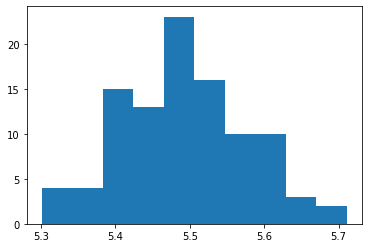

In [16]:
import matplotlib.pyplot as plt
import random
a=np.zeros((100,))
for i in range(100):
    x=[random.uniform(1,10) for _ in range(1000)]
    a[i]=np.sum(x,axis=0)/1000
plt.hist(a)

#### Gaussian Distribution
A Gaussian is a *continuous probability distribution* that is completely described with two parameters, the mean ($\mu$) and the variance ($\sigma^2$). It is defined as:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$
Range is $$[-\inf,\inf] $$


This is just a function of mean($\mu$) and standard deviation ($\sigma$) and what gives the normal distribution the charecteristic **bell curve**. 

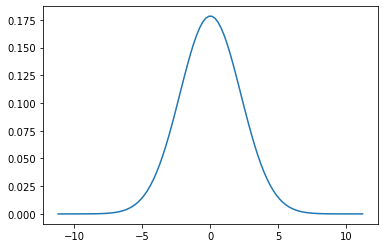

In [17]:
import matplotlib.mlab as mlab
import math
import scipy.stats

mu = 0
variance = 5
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x,scipy.stats.norm.pdf(x, mu, sigma))
plt.show()


#### Why do we need Gaussian distributions?
Since it becomes really difficult in the real world to deal with multimodal distribution as we cannot put the belief in two seperate location of the robots. This becomes really confusing and in practice impossible to comprehend. 
Gaussian probability distribution allows us to drive the robots using only one mode with peak at the mean with some variance.

### Gaussian Properties

**Multiplication**


For the measurement update in a Bayes Filter, the algorithm tells us to multiply the Prior P(X_t) and measurement P(Z_t|X_t) to calculate the posterior:

$$P(X \mid Z) = \frac{P(Z \mid X)P(X)}{P(Z)}$$

Here for the numerator,  $P(Z \mid X),P(X)$ both are gaussian.

$N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$ are their mean and variances.

New mean is 

$$\mu_\mathtt{new} = \frac{\mu_1 \sigma_2^2 + \mu_2 \sigma_1^2}{\sigma_1^2+\sigma_2^2}$$
New variance is
$$\sigma_\mathtt{new} = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}$$

New mean is at:  5.0
New variance is:  1.0


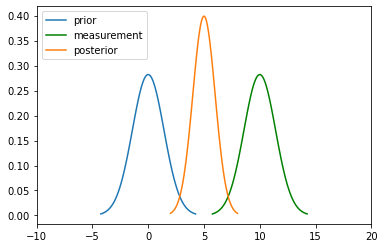

In [18]:
import matplotlib.mlab as mlab
import math
mu1 = 0
variance1 = 2
sigma = math.sqrt(variance1)
x1 = np.linspace(mu1 - 3*sigma, mu1 + 3*sigma, 100)
plt.plot(x1,scipy.stats.norm.pdf(x1, mu1, sigma),label='prior')

mu2 = 10
variance2 = 2
sigma = math.sqrt(variance2)
x2 = np.linspace(mu2 - 3*sigma, mu2 + 3*sigma, 100)
plt.plot(x2,scipy.stats.norm.pdf(x2, mu2, sigma),"g-",label='measurement')


mu_new=(mu1*variance2+mu2*variance1)/(variance1+variance2)
print("New mean is at: ",mu_new)
var_new=(variance1*variance2)/(variance1+variance2)
print("New variance is: ",var_new)
sigma = math.sqrt(var_new)
x3 = np.linspace(mu_new - 3*sigma, mu_new + 3*sigma, 100)
plt.plot(x3,scipy.stats.norm.pdf(x3, mu_new, var_new),label="posterior")
plt.legend(loc='upper left')
plt.xlim(-10,20)
plt.show()


**Addition**

The motion step involves a case of adding up probability (Since it has to abide the Law of Total Probability). This means their beliefs are to be added and hence two gaussians. They are simply arithmetic additions of the two.

$$\begin{gathered}\mu_x = \mu_p + \mu_z \\
\sigma_x^2 = \sigma_z^2+\sigma_p^2\, \square\end{gathered}$$

New mean is at:  15
New variance is:  2


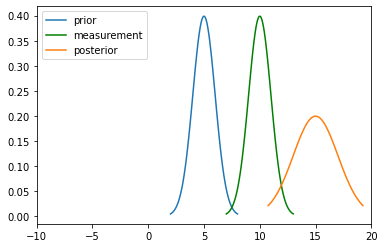

In [19]:
import matplotlib.mlab as mlab
import math
mu1 = 5
variance1 = 1
sigma = math.sqrt(variance1)
x1 = np.linspace(mu1 - 3*sigma, mu1 + 3*sigma, 100)
plt.plot(x1,scipy.stats.norm.pdf(x1, mu1, sigma),label='prior')

mu2 = 10
variance2 = 1
sigma = math.sqrt(variance2)
x2 = np.linspace(mu2 - 3*sigma, mu2 + 3*sigma, 100)
plt.plot(x2,scipy.stats.norm.pdf(x2, mu2, sigma),"g-",label='measurement')


mu_new=mu1+mu2
print("New mean is at: ",mu_new)
var_new=(variance1+variance2)
print("New variance is: ",var_new)
sigma = math.sqrt(var_new)
x3 = np.linspace(mu_new - 3*sigma, mu_new + 3*sigma, 100)
plt.plot(x3,scipy.stats.norm.pdf(x3, mu_new, var_new),label="posterior")
plt.legend(loc='upper left')
plt.xlim(-10,20)
plt.show()

<ipython-input-20-30f041b9dbdb>:46: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


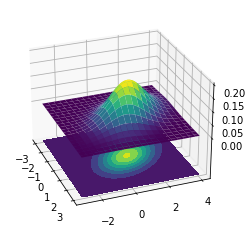

In [20]:
#Example from:
#https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()


This is a 3D projection of the gaussians involved with the lower surface showing the 2D projection of the 3D projection above. The innermost ellipse represents the highest peak, that is the maximum probability for a given (X,Y) value.




** numpy einsum examples **

In [21]:
a = np.arange(25).reshape(5,5)
b = np.arange(5)
c = np.arange(6).reshape(2,3)
print(a)
print(b)
print(c)


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[0 1 2 3 4]
[[0 1 2]
 [3 4 5]]


In [22]:
#this is the diagonal sum, i repeated means the diagonal
np.einsum('ij', a)
#this takes the output ii which is the diagonal and outputs to a
np.einsum('ii->i',a)
#this takes in the array A represented by their axes 'ij' and  B by its only axes'j' 
#and multiples them element wise
np.einsum('ij,j',a, b)

array([ 30,  80, 130, 180, 230])

In [23]:
A = np.arange(3).reshape(3,1)
B = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])
C=np.multiply(A,B)
np.sum(C,axis=1)

array([ 0, 22, 76])

In [24]:
D = np.array([0,1,2])
E = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])

np.einsum('i,ij->i',D,E)

array([ 0, 22, 76])

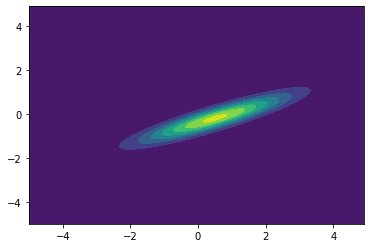

In [25]:
from scipy.stats import multivariate_normal
x, y = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.9], [0.9, 0.5]])
plt.contourf(x, y, rv.pdf(pos))



### References:

1. Roger Labbe's [repo](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python) on Kalman Filters. (Majority of the examples in the notes are from this)



2. Probabilistic Robotics by Sebastian Thrun, Wolfram Burgard and Dieter Fox, MIT Press.



3. Scipy [Documentation](https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/)